<a href="https://colab.research.google.com/github/Lotfullah21/Ai/blob/main/Celsius_to_fahrenhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Celsius to farenhits**






in tradational programming we had the set of inputs and algorithm to learn and give us the required output, but in Machine learning, we hava the inputs and the outputs, by training the neural network, the *computer is going to learn the relationship between input and output,
we have the algorithm which is
 
 f=c×1.8+32

in this lab, we will let computer to find the algorithm.

# **import the libraries**

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**set up the training data**

In [74]:
from numpy.core.fromnumeric import transpose
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)
row = (celsius,fahrenheit)

In [75]:
new_c = celsius.T
new_f = fahrenheit.T
combined = (new_c,new_f)
frame = pd.DataFrame(combined)
frame


,0,1,2,3,4,5,6
0,-40.0,-10.0,0.0,8.0,15.0,22.0,38.0
1,-40.0,14.0,32.0,46.0,59.0,72.0,100.0


### Using pandas data frame to get a better view of our data.

In [76]:
names = ["Celsius","Fahrenheit"]
new_frame = pd.DataFrame(row,names).T
new_frame

,Celsius,Fahrenheit
0,-40.0,-40.0
1,-10.0,14.0
2,0.0,32.0
3,8.0,46.0
4,15.0,59.0
5,22.0,72.0
6,38.0,100.0


##**Create the Module**
For this problem, we will use from the simplet neurel network which consist of a single neuron, 
##**Build a Layer**
while building the layers of a network, we have many parameters to consider, but we the two most important ones are
###**input_shape**: 
which decide the input to the next layers which x's acts as input to be in which dimension, in this case it is one dimension, which the degrees in celsius
####**input_Shappe=1**
###**Units**: 
this specifies the number of the neurons in the layers, more number of neurons means,more complex our network,in this case more parameters to consider which results in better mapping the inputs to outputs, in this example as we have one layer , the number of neurons in input should be same as the output ones, because,here, It is a direct match.
in our case here, the outputs are farenheite degress which are in one dimension
####**units=1**
####**Dense**: 
Dense means every single inputs is connected to the output and vise verca

In [79]:
simple_layers = tf.keras.layers.Dense(input_shape=[1],units=1)

####**Combine the layers into the model**

In [78]:
mdoel = tf.keras.Sequential([simple_layers])

we can directly define the layers inside the sequenrtial model too

In [77]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(
    input_shape=[1],
    units = 1
))

###**Compile the model, for loss function and optimizer to reduce the loss fucntion**
as we can see while compiling, we are giving two parameters, loss and optimizer
###**Loss**: 
it says how we unhappy we are about the result which we got or how different it si during the training from it's true labels.
###**Optimizer**: 
Optimizer will try to learn and adjust the weights(parameters) in such a way that minimizes the loss.
###**Learning Rate**:
Learning rate says how much big our steps should be while learning,if it is too small, the learning process takes time, if it is large, then, we will face the overshooting or never approaching to optimal point.


In [81]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model
we train the model by calling the fit method, which is method in the backend. as of now we will go in details.
in fit method we are having the features(inputs(celsius)), labels(output(fahrenheit)), epochs, and verose.
#### Epochs:
It is the number of times we want to go to through the training data, to learn the parameters, for example, if epochs = 100, it means that we are going one hundred times to the training to learn the parameters, which we call it weights of the features, it says how much does a specfic input contribute to the loss or error, if a specific feature contribute more to the loss, which we mean that most of the errors happened because of that feature,we will reduce the weights, so that, reduce it's contribution to the result.

we are do forward pass ones, which means going once through all data set and calculate all the losses, second time doing backward pass, the backpropagation one, after doing the forward pass and comparing the results to the desired output to adjsut the weights. this whole process also can be called an epoch

In [91]:
history = model.fit(celsius, fahrenheit,epochs = 500, verbose = False)

## Dispaly in the results by using Matplot

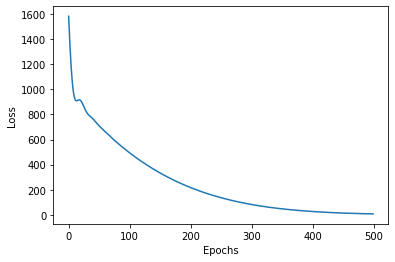

In [83]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

## Using the trained model to predict new values based on what it has been trained

Here, the whole purpose was to try find the realtion ship between the features and the labels. 
now, we will try to see how the model predicts

In [89]:
print(model.predict([543]))

[[1017.9508]]


In [90]:
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[1.8208002]], dtype=float32), array([29.25628], dtype=float32)]


we had the relation ship of , in the above, we will get different values for c and the constant, but they will be very close to our original function.
### f=c×1.8+32